https://drive.google.com/file/d/1q2HJUnXBREUf1RB2bJCdbZsgvyu99FAf/view?usp=share_link

#Smoking

In [647]:
! gdown 1q2HJUnXBREUf1RB2bJCdbZsgvyu99FAf

Downloading...
From: https://drive.google.com/uc?id=1q2HJUnXBREUf1RB2bJCdbZsgvyu99FAf
To: /content/leopard-challenge-classification.zip
100% 639k/639k [00:00<00:00, 100MB/s]


In [648]:
! unzip -o /content/leopard-challenge-classification.zip -d /content/leopard-challenge

Archive:  /content/leopard-challenge-classification.zip
  inflating: /content/leopard-challenge/sample_submission.csv  
  inflating: /content/leopard-challenge/test.csv  
  inflating: /content/leopard-challenge/train.csv  


In [649]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [650]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [651]:
!pip install phik 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Import

In [652]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
import missingno as msno

import phik

import folium

from sklearn.metrics import log_loss 
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from catboost import CatBoostClassifier, Pool, cv

#import optuna
#optuna.logging.set_verbosity(optuna.logging.WARNING)

#import joblib

import shap
#shap.initjs()

In [653]:
df = pd.read_csv('/content/leopard-challenge/train.csv')

In [654]:
test_kaggle = pd.read_csv('/content/leopard-challenge/test.csv')

In [655]:
def display_info(df):
    
    print('head()')
    display(df.head())
    print('')
    print('info(')
    display(df.info(memory_usage='deep')) 
    print('')
    print('msno')
    print(msno.bar(df))
    print('')
    print('nunique()')
    display(df.nunique().to_frame())

In [656]:
pd.options.display.max_columns = 100 

head()


,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1



info(
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height(cm)           13863 non-null  int64  
 3   weight(kg)           13863 non-null  int64  
 4   waist(cm)            13863 non-null  float64
 5   eyesight(left)       13863 non-null  float64
 6   eyesight(right)      13863 non-null  float64
 7   hearing(left)        13863 non-null  float64
 8   hearing(right)       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting blood sugar  13863 non-null  float64
 12  Cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  HDL                  13863 non-null  float64
 15  LDL                  13863 no

None


msno
Axes(0.125,0.11;0.775x0.77)

nunique()


,0
ID,13863
age,14
height(cm),10
weight(kg),19
waist(cm),441
eyesight(left),18
eyesight(right),16
hearing(left),2
hearing(right),2
systolic,101


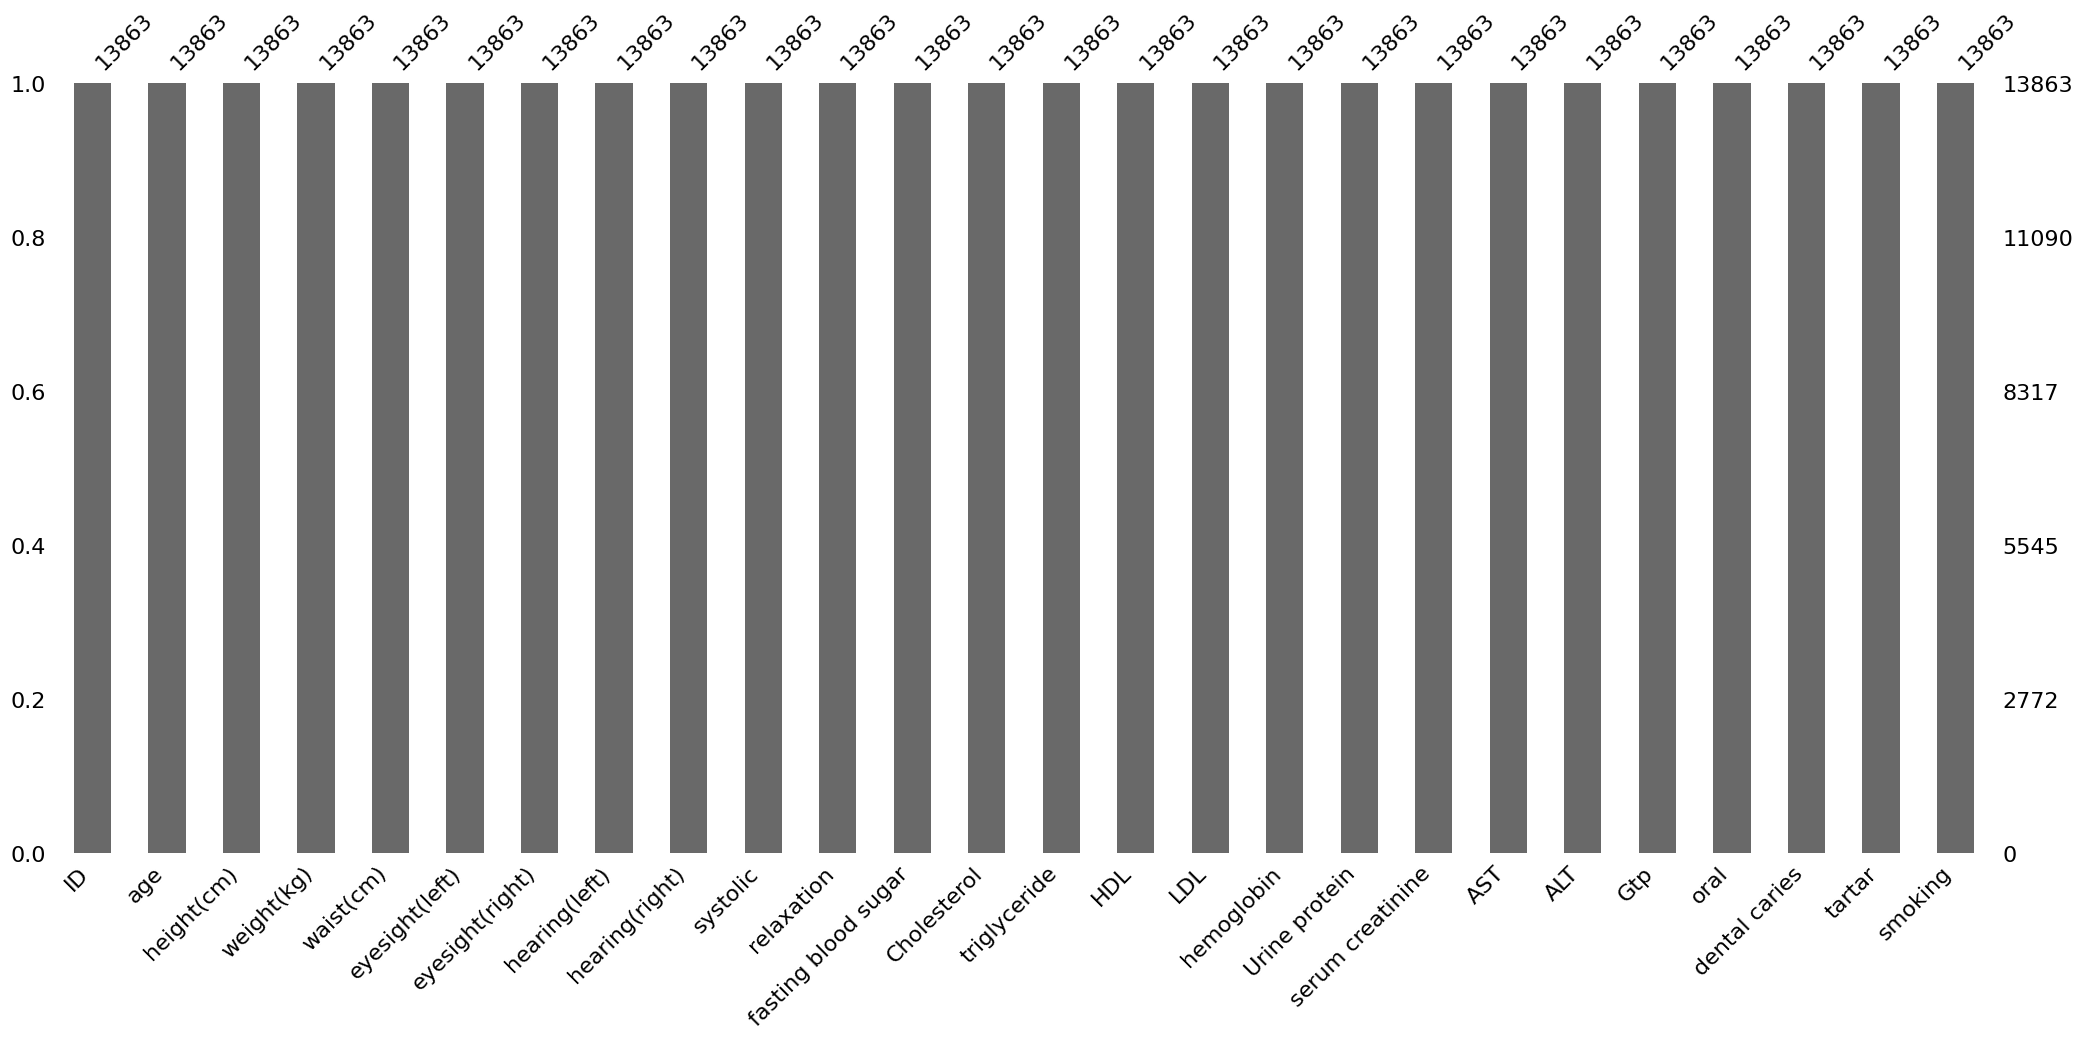

In [657]:
display_info(df)

head()


,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,19200,40,170,75,87.0,1.2,1.0,1.0,1.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,Y,0,Y
1,7784,25,170,65,78.4,0.9,0.9,1.0,1.0,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,Y,0,N
2,11682,50,180,105,109.3,0.9,1.0,1.0,1.0,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,Y,0,Y
3,9949,60,160,60,81.0,0.5,0.5,1.0,1.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,Y,0,Y
4,9378,45,175,70,83.0,0.9,1.0,1.0,1.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,Y,0,N



info(
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5942 non-null   int64  
 1   age                  5942 non-null   int64  
 2   height(cm)           5942 non-null   int64  
 3   weight(kg)           5942 non-null   int64  
 4   waist(cm)            5942 non-null   float64
 5   eyesight(left)       5942 non-null   float64
 6   eyesight(right)      5942 non-null   float64
 7   hearing(left)        5942 non-null   float64
 8   hearing(right)       5942 non-null   float64
 9   systolic             5942 non-null   float64
 10  relaxation           5942 non-null   float64
 11  fasting blood sugar  5942 non-null   float64
 12  Cholesterol          5942 non-null   float64
 13  triglyceride         5942 non-null   float64
 14  HDL                  5942 non-null   float64
 15  LDL                  5942 non-n

None


msno
Axes(0.125,0.11;0.775x0.77)

nunique()


,0
ID,5942
age,14
height(cm),10
weight(kg),18
waist(cm),374
eyesight(left),15
eyesight(right),16
hearing(left),2
hearing(right),2
systolic,94


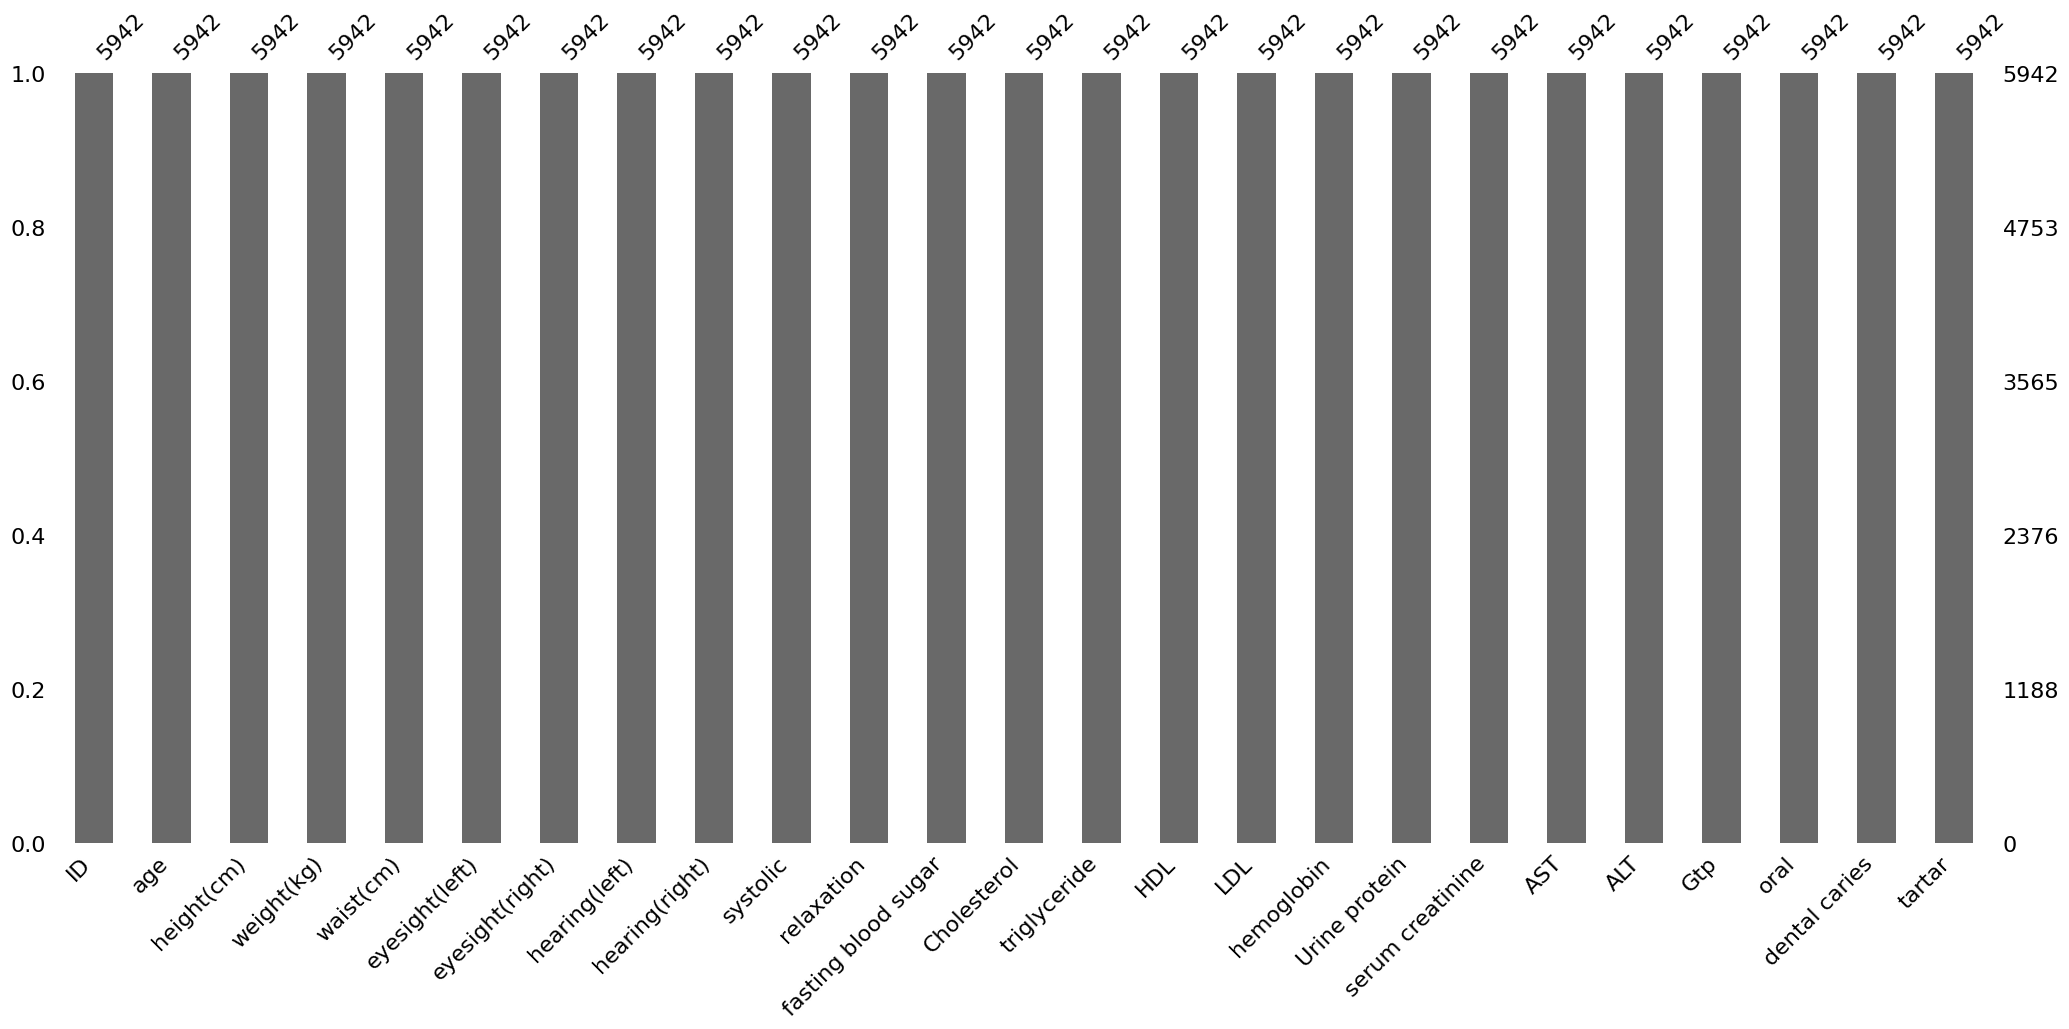

In [658]:
display_info(test_kaggle)

In [659]:
df.describe(include = "object").T

,count,unique,top,freq
oral,13863,1,Y,13863
tartar,13863,2,Y,7517


In [660]:
df.columns

Index(['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'oral', 'dental caries', 'tartar', 'smoking'],
      dtype='object')

In [661]:
desc = df[['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries']].describe().style.background_gradient(cmap = "coolwarm")

styles = [
    dict(selector="th.col_heading", props=[("position", "sticky"), ("left", "0")]),
    dict(selector="th.row_heading", props=[("position", "sticky"), ("left", "0")]),
    dict(selector="td.index_name", props=[("opacity", "1")])
]


desc.set_table_styles(styles)


,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000
mean,9932.891654,41.743851,169.618409,71.270288,84.870627,1.057304,1.053740,1.028060,1.027411,123.430643,77.166703,99.937387,193.864387,130.917767,54.204357,114.435476,15.402200,1.093775,0.981808,27.597562,30.772921,43.442978,0.212075
std,5715.739532,13.624383,6.493959,11.195751,8.194957,0.514618,0.514613,0.165151,0.163284,12.964684,9.459288,20.682085,35.658783,71.348298,13.168432,42.050428,1.052598,0.421272,0.240337,21.559820,36.441688,50.342097,0.408793
min,1.000000,20.000000,145.000000,40.000000,51.000000,0.100000,0.100000,1.000000,1.000000,74.000000,40.000000,48.000000,84.000000,16.000000,4.000000,7.000000,6.300000,1.000000,0.100000,7.000000,2.000000,2.000000,0.000000
25%,4985.500000,30.000000,165.000000,65.000000,79.200000,0.800000,0.800000,1.000000,1.000000,115.000000,70.000000,90.000000,169.000000,78.000000,45.000000,91.000000,14.800000,1.000000,0.900000,20.000000,18.000000,20.000000,0.000000
50%,9956.000000,40.000000,170.000000,70.000000,84.400000,1.000000,1.000000,1.000000,1.000000,122.000000,78.000000,96.000000,192.000000,113.000000,53.000000,113.000000,15.400000,1.000000,1.000000,24.000000,24.000000,29.000000,0.000000
75%,14865.500000,50.000000,175.000000,80.000000,90.000000,1.200000,1.200000,1.000000,1.000000,131.000000,83.000000,104.000000,216.000000,166.000000,61.000000,135.000000,16.100000,1.000000,1.100000,30.000000,35.000000,48.000000,0.000000
max,19804.000000,85.000000,190.000000,130.000000,128.000000,9.900000,9.900000,2.000000,2.000000,240.000000,140.000000,475.000000,441.000000,466.000000,359.000000,1340.000000,19.600000,6.000000,10.000000,981.000000,2914.000000,999.000000,1.000000


<Axes: >

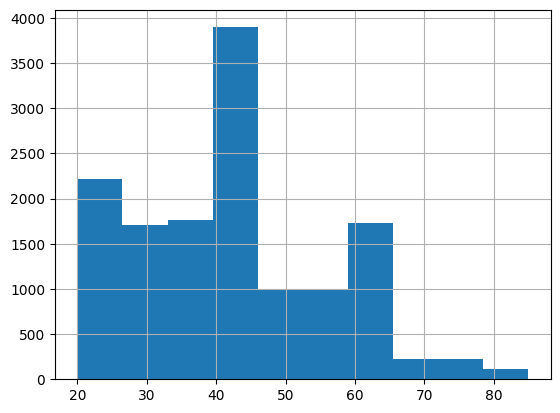

In [662]:
df['age'].hist()

<Axes: >

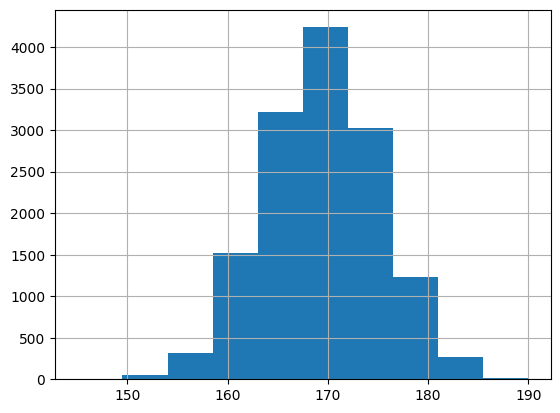

In [663]:
df['height(cm)'].hist()

<Axes: >

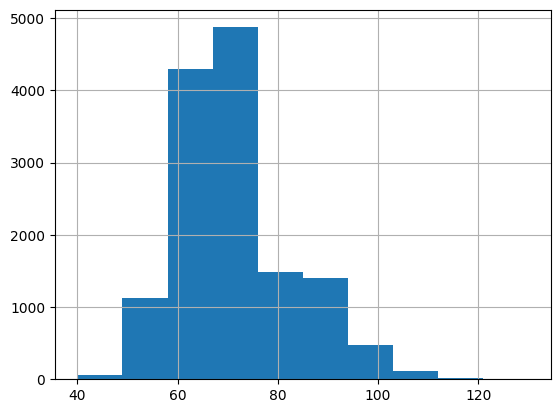

In [664]:
df['weight(kg)'].hist()

In [665]:
df['smoking'].value_counts()

0    11063
1     2800
Name: smoking, dtype: int64

In [666]:
df['smoking'].value_counts(normalize=True)

0    0.798024
1    0.201976
Name: smoking, dtype: float64

##Test, train set

In [667]:
train, test = train_test_split(df,train_size=0.6,random_state=42,stratify=df['smoking'])

In [668]:
val, test = train_test_split(test,train_size=0.5,random_state=42,stratify=test['smoking'])

In [669]:
test['smoking'].mean()

0.2019473494410386

##Phik

In [670]:
train_full = pd.concat([train,val])

In [671]:
phik_overview = train_full.phik_matrix()

interval columns not set, guessing: ['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']


Not enough unique value for variable oral for analysis 1. Dropping this column


In [672]:
phik_overview['smoking'].sort_values(ascending=False)

smoking                1.000000
triglyceride           0.189219
age                    0.177987
Gtp                    0.150403
hemoglobin             0.116126
tartar                 0.105378
dental caries          0.081267
waist(cm)              0.055036
HDL                    0.040334
serum creatinine       0.039724
weight(kg)             0.038986
fasting blood sugar    0.034552
Urine protein          0.031863
height(cm)             0.028343
AST                    0.027084
hearing(left)          0.026962
hearing(right)         0.026589
LDL                    0.022210
systolic               0.019669
relaxation             0.018161
ALT                    0.016296
ID                     0.000000
eyesight(right)        0.000000
eyesight(left)         0.000000
Cholesterol            0.000000
Name: smoking, dtype: float64

##Baseline

In [673]:
train_full['score_mean'] = train_full['smoking'].mean()

In [674]:
train_full

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,score_mean
12806,7760,20,175,65,69.3,1.2,0.9,1.0,1.0,130.0,78.0,71.0,171.0,53.0,74.0,70.0,14.3,1.0,1.1,23.0,16.0,18.0,Y,1,Y,0,0.201984
2761,4579,30,180,80,92.3,0.3,0.6,1.0,1.0,113.0,60.0,104.0,208.0,160.0,68.0,115.0,16.3,1.0,0.9,28.0,25.0,33.0,Y,0,Y,0,0.201984
7103,4401,30,170,60,70.0,1.0,0.7,1.0,1.0,150.0,90.0,98.0,130.0,36.0,53.0,59.0,14.7,1.0,1.1,26.0,22.0,23.0,Y,1,Y,0,0.201984
7115,4825,40,165,60,79.0,0.5,1.0,1.0,1.0,100.0,64.0,94.0,159.0,146.0,45.0,85.0,14.8,1.0,1.0,25.0,11.0,33.0,Y,0,N,1,0.201984
13437,15756,25,170,70,82.6,1.5,1.5,1.0,1.0,124.0,80.0,87.0,192.0,167.0,47.0,112.0,15.4,1.0,0.9,29.0,37.0,23.0,Y,0,N,0,0.201984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11402,1837,40,175,85,93.0,1.2,1.0,1.0,1.0,126.0,78.0,106.0,188.0,184.0,54.0,97.0,14.6,1.0,1.1,23.0,43.0,58.0,Y,0,N,0,0.201984
7451,15517,25,175,80,92.5,0.7,0.5,1.0,1.0,142.0,82.0,87.0,187.0,59.0,94.0,82.0,15.4,1.0,0.9,16.0,12.0,14.0,Y,0,Y,1,0.201984
7311,9164,30,170,80,89.0,1.2,1.5,1.0,1.0,134.0,75.0,105.0,172.0,196.0,39.0,93.0,16.2,1.0,0.7,28.0,30.0,59.0,Y,0,Y,1,0.201984
13466,7648,45,175,70,90.4,0.9,0.8,1.0,1.0,120.0,82.0,261.0,213.0,268.0,65.0,94.0,14.8,1.0,0.7,48.0,47.0,477.0,Y,1,Y,1,0.201984


In [675]:
test['score_prod'] = test['smoking'].mean()

##Human learning

<Axes: >

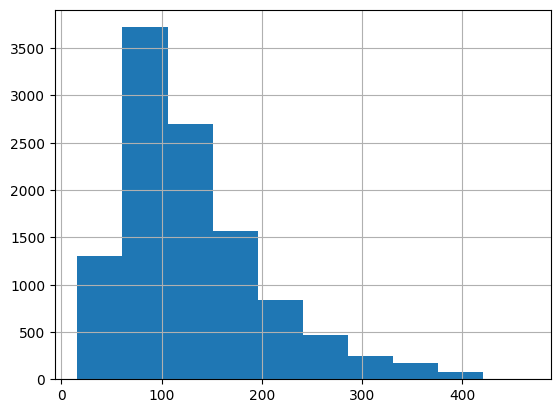

In [676]:
train_full['triglyceride'].hist()

In [677]:
pd.qcut(train_full['triglyceride'],5,retbins=True,labels=False)

(12806    0
 2761     3
 7103     0
 7115     3
 13437    3
         ..
 11402    4
 7451     0
 7311     4
 13466    4
 9792     2
 Name: triglyceride, Length: 11090, dtype: int64,
 array([ 16.,  71.,  98., 130., 181., 466.]))

In [678]:
train_full['trig_group'] = pd.cut(train_full['triglyceride'],[0,71,98,130,181, float('inf')])

In [679]:
train_full.groupby(['trig_group'])['smoking'].agg(['count','mean'])

,count,mean
trig_group,,
"(0.0, 71.0]",2234,0.117726
"(71.0, 98.0]",2212,0.162297
"(98.0, 130.0]",2240,0.212946
"(130.0, 181.0]",2201,0.222626
"(181.0, inf]",2203,0.295506


In [680]:
model = train_full.groupby(['trig_group'])['smoking'].mean().reset_index()

In [681]:
model = model.rename({'smoking':'score_trig'},axis=1)

In [682]:
model

,trig_group,score_trig
0,"(0.0, 71.0]",0.117726
1,"(71.0, 98.0]",0.162297
2,"(98.0, 130.0]",0.212946
3,"(130.0, 181.0]",0.222626
4,"(181.0, inf]",0.295506


In [683]:
train_full = train_full.merge(model,how='left',on='trig_group')

In [684]:
train_full

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,score_mean,trig_group,score_trig
0,7760,20,175,65,69.3,1.2,0.9,1.0,1.0,130.0,78.0,71.0,171.0,53.0,74.0,70.0,14.3,1.0,1.1,23.0,16.0,18.0,Y,1,Y,0,0.201984,"(0.0, 71.0]",0.117726
1,4579,30,180,80,92.3,0.3,0.6,1.0,1.0,113.0,60.0,104.0,208.0,160.0,68.0,115.0,16.3,1.0,0.9,28.0,25.0,33.0,Y,0,Y,0,0.201984,"(130.0, 181.0]",0.222626
2,4401,30,170,60,70.0,1.0,0.7,1.0,1.0,150.0,90.0,98.0,130.0,36.0,53.0,59.0,14.7,1.0,1.1,26.0,22.0,23.0,Y,1,Y,0,0.201984,"(0.0, 71.0]",0.117726
3,4825,40,165,60,79.0,0.5,1.0,1.0,1.0,100.0,64.0,94.0,159.0,146.0,45.0,85.0,14.8,1.0,1.0,25.0,11.0,33.0,Y,0,N,1,0.201984,"(130.0, 181.0]",0.222626
4,15756,25,170,70,82.6,1.5,1.5,1.0,1.0,124.0,80.0,87.0,192.0,167.0,47.0,112.0,15.4,1.0,0.9,29.0,37.0,23.0,Y,0,N,0,0.201984,"(130.0, 181.0]",0.222626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11085,1837,40,175,85,93.0,1.2,1.0,1.0,1.0,126.0,78.0,106.0,188.0,184.0,54.0,97.0,14.6,1.0,1.1,23.0,43.0,58.0,Y,0,N,0,0.201984,"(181.0, inf]",0.295506
11086,15517,25,175,80,92.5,0.7,0.5,1.0,1.0,142.0,82.0,87.0,187.0,59.0,94.0,82.0,15.4,1.0,0.9,16.0,12.0,14.0,Y,0,Y,1,0.201984,"(0.0, 71.0]",0.117726
11087,9164,30,170,80,89.0,1.2,1.5,1.0,1.0,134.0,75.0,105.0,172.0,196.0,39.0,93.0,16.2,1.0,0.7,28.0,30.0,59.0,Y,0,Y,1,0.201984,"(181.0, inf]",0.295506
11088,7648,45,175,70,90.4,0.9,0.8,1.0,1.0,120.0,82.0,261.0,213.0,268.0,65.0,94.0,14.8,1.0,0.7,48.0,47.0,477.0,Y,1,Y,1,0.201984,"(181.0, inf]",0.295506


In [685]:
log_loss(train_full['smoking'],train_full['score_mean'])

0.5031402439350859

In [686]:
log_loss(train_full['smoking'],train_full['score_trig'])

0.4918529048967862

In [687]:
test['trig_group'] = pd.cut(test['triglyceride'],[0,71,98,130,181, float('inf')])

In [688]:
test = test.merge(model,how='left',on='trig_group')

In [689]:
log_loss(test['smoking'],test['score_prod'])

0.503090201251796

In [690]:
log_loss(test['smoking'],test['score_trig'])

0.49234333805150976

##Uplift

In [691]:
def uplift(df,score,pct): 
  exited_all = df['smoking'].sum()
  df = df.sort_values(score,ascending=False)
  exited_found = df.head(round(len(df) * pct))['smoking'].sum()

  return (exited_found / exited_all) / pct

In [692]:
log_loss(train_full['smoking'],train_full['score_mean'])

0.5031402439350859

In [693]:
uplift(train_full,'score_mean',0.2)

0.9620535714285714

In [694]:
def print_metrics(df,score):
  print(f'{score}:')
  print('log_loss -', log_loss(df['smoking'],df[score]))
  print('uplift -', uplift(df,score,0.2)) 

In [695]:
print_metrics(train_full, 'score_mean')

score_mean:
log_loss - 0.5031402439350859
uplift - 0.9620535714285714


In [696]:
print_metrics(train_full, 'score_trig')

score_trig:
log_loss - 0.4918529048967862
uplift - 1.453125


##Age

In [697]:
pd.qcut(train_full['age'],5,retbins=True,labels=False)

(0        0
 1        0
 2        0
 3        2
 4        0
         ..
 11085    2
 11086    0
 11087    0
 11088    2
 11089    4
 Name: age, Length: 11090, dtype: int64,
 array([20., 30., 35., 45., 55., 85.]))

In [698]:
train_full['age_group'] = pd.cut(train_full['age'],[0,30,35,45,55, float('inf')])

In [699]:
train_full.groupby(['age_group'])['smoking'].agg(['count','mean'])

,count,mean
age_group,,
"(0.0, 30.0]",3136,0.165816
"(30.0, 35.0]",1390,0.167626
"(35.0, 45.0]",3109,0.270827
"(45.0, 55.0]",1614,0.239157
"(55.0, inf]",1841,0.140684


In [700]:
model = train_full.groupby(['trig_group','age_group'])['smoking'].mean().reset_index()

In [701]:
model = model.rename({'smoking':'score_trig_age'},axis=1)

In [702]:
model

,trig_group,age_group,score_trig_age
0,"(0.0, 71.0]","(0.0, 30.0]",0.114548
1,"(0.0, 71.0]","(30.0, 35.0]",0.071730
2,"(0.0, 71.0]","(35.0, 45.0]",0.166329
3,"(0.0, 71.0]","(45.0, 55.0]",0.132353
4,"(0.0, 71.0]","(55.0, inf]",0.077994
5,"(71.0, 98.0]","(0.0, 30.0]",0.124642
6,"(71.0, 98.0]","(30.0, 35.0]",0.176030
7,"(71.0, 98.0]","(35.0, 45.0]",0.226381
8,"(71.0, 98.0]","(45.0, 55.0]",0.194946
9,"(71.0, 98.0]","(55.0, inf]",0.107579


In [703]:
train_full = train_full.merge(model,how='left',on=['trig_group','age_group'])

In [704]:
train_full

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,score_mean,trig_group,score_trig,age_group,score_trig_age
0,7760,20,175,65,69.3,1.2,0.9,1.0,1.0,130.0,78.0,71.0,171.0,53.0,74.0,70.0,14.3,1.0,1.1,23.0,16.0,18.0,Y,1,Y,0,0.201984,"(0.0, 71.0]",0.117726,"(0.0, 30.0]",0.114548
1,4579,30,180,80,92.3,0.3,0.6,1.0,1.0,113.0,60.0,104.0,208.0,160.0,68.0,115.0,16.3,1.0,0.9,28.0,25.0,33.0,Y,0,Y,0,0.201984,"(130.0, 181.0]",0.222626,"(0.0, 30.0]",0.206166
2,4401,30,170,60,70.0,1.0,0.7,1.0,1.0,150.0,90.0,98.0,130.0,36.0,53.0,59.0,14.7,1.0,1.1,26.0,22.0,23.0,Y,1,Y,0,0.201984,"(0.0, 71.0]",0.117726,"(0.0, 30.0]",0.114548
3,4825,40,165,60,79.0,0.5,1.0,1.0,1.0,100.0,64.0,94.0,159.0,146.0,45.0,85.0,14.8,1.0,1.0,25.0,11.0,33.0,Y,0,N,1,0.201984,"(130.0, 181.0]",0.222626,"(35.0, 45.0]",0.270062
4,15756,25,170,70,82.6,1.5,1.5,1.0,1.0,124.0,80.0,87.0,192.0,167.0,47.0,112.0,15.4,1.0,0.9,29.0,37.0,23.0,Y,0,N,0,0.201984,"(130.0, 181.0]",0.222626,"(0.0, 30.0]",0.206166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11085,1837,40,175,85,93.0,1.2,1.0,1.0,1.0,126.0,78.0,106.0,188.0,184.0,54.0,97.0,14.6,1.0,1.1,23.0,43.0,58.0,Y,0,N,0,0.201984,"(181.0, inf]",0.295506,"(35.0, 45.0]",0.380463
11086,15517,25,175,80,92.5,0.7,0.5,1.0,1.0,142.0,82.0,87.0,187.0,59.0,94.0,82.0,15.4,1.0,0.9,16.0,12.0,14.0,Y,0,Y,1,0.201984,"(0.0, 71.0]",0.117726,"(0.0, 30.0]",0.114548
11087,9164,30,170,80,89.0,1.2,1.5,1.0,1.0,134.0,75.0,105.0,172.0,196.0,39.0,93.0,16.2,1.0,0.7,28.0,30.0,59.0,Y,0,Y,1,0.201984,"(181.0, inf]",0.295506,"(0.0, 30.0]",0.259825
11088,7648,45,175,70,90.4,0.9,0.8,1.0,1.0,120.0,82.0,261.0,213.0,268.0,65.0,94.0,14.8,1.0,0.7,48.0,47.0,477.0,Y,1,Y,1,0.201984,"(181.0, inf]",0.295506,"(35.0, 45.0]",0.380463


In [705]:
print_metrics(train_full, 'score_mean')

score_mean:
log_loss - 0.5031402439350859
uplift - 0.9620535714285714


In [706]:
print_metrics(train_full, 'score_trig')

score_trig:
log_loss - 0.4918529048967862
uplift - 1.453125


In [707]:
print_metrics(train_full, 'score_trig_age') 

score_trig_age:
log_loss - 0.4844592933785467
uplift - 1.5803571428571428


In [708]:
test['age_group'] = pd.cut(test['age'],[0,30,35,45,55, float('inf')])

In [709]:
test = test.merge(model,how='left',on=['trig_group', 'age_group'])

In [710]:
print_metrics(test, 'score_prod')

score_prod:
log_loss - 0.503090201251796
uplift - 1.2410714285714286


In [711]:
print_metrics(test, 'score_trig')

score_trig:
log_loss - 0.49234333805150976
uplift - 1.4464285714285714


In [712]:
print_metrics(test, 'score_trig_age')

score_trig_age:
log_loss - 0.4833894533079351
uplift - 1.5803571428571428


##Gtp

<Axes: >

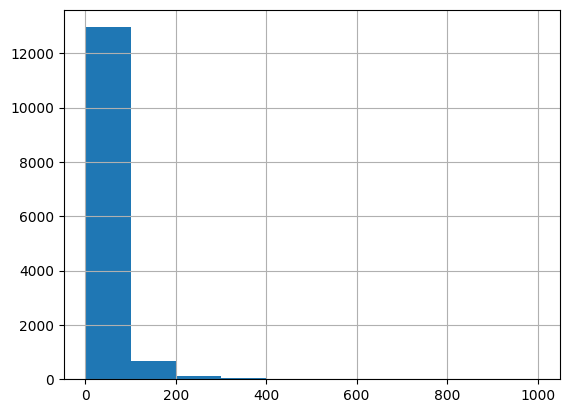

In [713]:
df['Gtp'].hist()

In [714]:
pd.qcut(train_full['Gtp'],5,retbins=True,labels=False)

(0        0
 1        2
 2        1
 3        2
 4        1
         ..
 11085    4
 11086    0
 11087    4
 11088    4
 11089    1
 Name: Gtp, Length: 11090, dtype: int64,
 array([  2.,  19.,  25.,  34.,  55., 999.]))

In [715]:
train_full['gtp_group'] = pd.cut(train_full['Gtp'],[0,2,19,25,34,55, float('inf')])

In [716]:
train_full.groupby(['gtp_group'])['smoking'].agg(['count','mean'])

,count,mean
gtp_group,,
"(0.0, 2.0]",1,0.000000
"(2.0, 19.0]",2576,0.129270
"(19.0, 25.0]",2028,0.144970
"(25.0, 34.0]",2068,0.189555
"(34.0, 55.0]",2268,0.235009
"(55.0, inf]",2149,0.320149


In [717]:
model = train_full.groupby(['trig_group','age_group' ,'gtp_group'])['smoking'].mean().reset_index()

In [718]:
model

,trig_group,age_group,gtp_group,smoking
0,"(0.0, 71.0]","(0.0, 30.0]","(0.0, 2.0]",NaN
1,"(0.0, 71.0]","(0.0, 30.0]","(2.0, 19.0]",0.105603
2,"(0.0, 71.0]","(0.0, 30.0]","(19.0, 25.0]",0.123656
3,"(0.0, 71.0]","(0.0, 30.0]","(25.0, 34.0]",0.121739
4,"(0.0, 71.0]","(0.0, 30.0]","(34.0, 55.0]",0.108108
...,...,...,...,...
145,"(181.0, inf]","(55.0, inf]","(2.0, 19.0]",0.210526
146,"(181.0, inf]","(55.0, inf]","(19.0, 25.0]",0.170732
147,"(181.0, inf]","(55.0, inf]","(25.0, 34.0]",0.155556
148,"(181.0, inf]","(55.0, inf]","(34.0, 55.0]",0.182796


In [719]:
model = model.rename({'smoking':'score_trig_age_gtp'},axis=1)

In [720]:
train_full = train_full.merge(model,how='left',on=['trig_group','age_group', 'gtp_group'])

In [721]:
train_full

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,score_mean,trig_group,score_trig,age_group,score_trig_age,gtp_group,score_trig_age_gtp
0,7760,20,175,65,69.3,1.2,0.9,1.0,1.0,130.0,78.0,71.0,171.0,53.0,74.0,70.0,14.3,1.0,1.1,23.0,16.0,18.0,Y,1,Y,0,0.201984,"(0.0, 71.0]",0.117726,"(0.0, 30.0]",0.114548,"(2.0, 19.0]",0.105603
1,4579,30,180,80,92.3,0.3,0.6,1.0,1.0,113.0,60.0,104.0,208.0,160.0,68.0,115.0,16.3,1.0,0.9,28.0,25.0,33.0,Y,0,Y,0,0.201984,"(130.0, 181.0]",0.222626,"(0.0, 30.0]",0.206166,"(25.0, 34.0]",0.194175
2,4401,30,170,60,70.0,1.0,0.7,1.0,1.0,150.0,90.0,98.0,130.0,36.0,53.0,59.0,14.7,1.0,1.1,26.0,22.0,23.0,Y,1,Y,0,0.201984,"(0.0, 71.0]",0.117726,"(0.0, 30.0]",0.114548,"(19.0, 25.0]",0.123656
3,4825,40,165,60,79.0,0.5,1.0,1.0,1.0,100.0,64.0,94.0,159.0,146.0,45.0,85.0,14.8,1.0,1.0,25.0,11.0,33.0,Y,0,N,1,0.201984,"(130.0, 181.0]",0.222626,"(35.0, 45.0]",0.270062,"(25.0, 34.0]",0.248120
4,15756,25,170,70,82.6,1.5,1.5,1.0,1.0,124.0,80.0,87.0,192.0,167.0,47.0,112.0,15.4,1.0,0.9,29.0,37.0,23.0,Y,0,N,0,0.201984,"(130.0, 181.0]",0.222626,"(0.0, 30.0]",0.206166,"(19.0, 25.0]",0.156627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11085,1837,40,175,85,93.0,1.2,1.0,1.0,1.0,126.0,78.0,106.0,188.0,184.0,54.0,97.0,14.6,1.0,1.1,23.0,43.0,58.0,Y,0,N,0,0.201984,"(181.0, inf]",0.295506,"(35.0, 45.0]",0.380463,"(55.0, inf]",0.480938
11086,15517,25,175,80,92.5,0.7,0.5,1.0,1.0,142.0,82.0,87.0,187.0,59.0,94.0,82.0,15.4,1.0,0.9,16.0,12.0,14.0,Y,0,Y,1,0.201984,"(0.0, 71.0]",0.117726,"(0.0, 30.0]",0.114548,"(2.0, 19.0]",0.105603
11087,9164,30,170,80,89.0,1.2,1.5,1.0,1.0,134.0,75.0,105.0,172.0,196.0,39.0,93.0,16.2,1.0,0.7,28.0,30.0,59.0,Y,0,Y,1,0.201984,"(181.0, inf]",0.295506,"(0.0, 30.0]",0.259825,"(55.0, inf]",0.301676
11088,7648,45,175,70,90.4,0.9,0.8,1.0,1.0,120.0,82.0,261.0,213.0,268.0,65.0,94.0,14.8,1.0,0.7,48.0,47.0,477.0,Y,1,Y,1,0.201984,"(181.0, inf]",0.295506,"(35.0, 45.0]",0.380463,"(55.0, inf]",0.480938


In [722]:
print_metrics(train_full, 'score_mean')

score_mean:
log_loss - 0.5031402439350859
uplift - 0.9620535714285714


In [723]:
print_metrics(train_full, 'score_trig')

score_trig:
log_loss - 0.4918529048967862
uplift - 1.453125


In [724]:
print_metrics(train_full, 'score_trig_age') 

score_trig_age:
log_loss - 0.4844592933785467
uplift - 1.5803571428571428


In [725]:
print_metrics(train_full, 'score_trig_age_gtp') 

score_trig_age_gtp:
log_loss - 0.4724461384392338
uplift - 1.7522321428571426


In [726]:
test['gtp_group'] = pd.cut(test['Gtp'],[0,2,19,25,34,55, float('inf')])

In [727]:
test = test.merge(model,how='left',on=['trig_group', 'age_group', 'gtp_group'])

In [728]:
print_metrics(test, 'score_prod')

score_prod:
log_loss - 0.503090201251796
uplift - 1.2410714285714286


In [729]:
print_metrics(test, 'score_trig')

score_trig:
log_loss - 0.49234333805150976
uplift - 1.4464285714285714


In [730]:
print_metrics(test, 'score_trig_age')

score_trig_age:
log_loss - 0.4833894533079351
uplift - 1.5803571428571428


In [731]:
print_metrics(test, 'score_trig_age_gtp')

score_trig_age_gtp:
log_loss - 0.4833053053519097
uplift - 1.6875


##Machine learning

In [732]:
train_full.columns

Index(['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'oral', 'dental caries', 'tartar', 'smoking',
       'score_mean', 'trig_group', 'score_trig', 'age_group', 'score_trig_age',
       'gtp_group', 'score_trig_age_gtp'],
      dtype='object')

In [733]:
X = ['triglyceride','age','Gtp']
y = ['smoking']

In [734]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.005}

In [735]:
model = CatBoostClassifier(**params)

In [736]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.6908956	test: 0.6908987	best: 0.6908987 (0)	total: 46.8ms	remaining: 46.8s
100:	learn: 0.5521256	test: 0.5521951	best: 0.5521951 (100)	total: 1.54s	remaining: 13.7s
200:	learn: 0.5042830	test: 0.5042820	best: 0.5042820 (200)	total: 2.93s	remaining: 11.6s
300:	learn: 0.4867560	test: 0.4867876	best: 0.4867876 (300)	total: 4.03s	remaining: 9.36s
400:	learn: 0.4793005	test: 0.4796819	best: 0.4796819 (400)	total: 4.91s	remaining: 7.34s
500:	learn: 0.4757475	test: 0.4765112	best: 0.4765112 (500)	total: 5.86s	remaining: 5.83s
600:	learn: 0.4734983	test: 0.4751143	best: 0.4751143 (600)	total: 6.91s	remaining: 4.58s
700:	learn: 0.4719227	test: 0.4743941	best: 0.4743941 (700)	total: 7.89s	remaining: 3.37s
800:	learn: 0.4706365	test: 0.4740055	best: 0.4740055 (800)	total: 8.65s	remaining: 2.15s
900:	learn: 0.4695171	test: 0.4738344	best: 0.4738219 (893)	total: 9.42s	remaining: 1.03s
999:	learn: 0.4684303	test: 0.4737519	best: 0.4737290 (985)	total: 10.1s	remaining: 0us

bestTest = 0.4

In [737]:
test['score_cat_trig_age_gtp'] = model.predict_proba(test[X])[:,1]

In [738]:
test

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,score_prod,trig_group,score_trig,age_group,score_trig_age,gtp_group,score_trig_age_gtp,score_cat_trig_age_gtp
0,2157,30,175,85,92.0,1.2,0.3,1.0,1.0,139.0,83.0,92.0,204.0,69.0,48.0,142.0,16.6,1.0,1.2,16.0,20.0,29.0,Y,0,Y,0,0.201947,"(0.0, 71.0]",0.117726,"(0.0, 30.0]",0.114548,"(25.0, 34.0]",0.121739,0.124865
1,7244,45,175,75,81.0,1.2,1.0,1.0,1.0,113.0,60.0,85.0,127.0,80.0,49.0,62.0,15.2,1.0,1.0,19.0,18.0,20.0,Y,1,Y,0,0.201947,"(71.0, 98.0]",0.162297,"(35.0, 45.0]",0.226381,"(19.0, 25.0]",0.179688,0.171807
2,5245,25,185,90,92.0,1.2,1.2,1.0,1.0,109.0,62.0,80.0,209.0,122.0,54.0,130.0,15.2,1.0,1.0,27.0,33.0,22.0,Y,0,N,0,0.201947,"(98.0, 130.0]",0.212946,"(0.0, 30.0]",0.181973,"(19.0, 25.0]",0.179310,0.162183
3,16182,40,175,70,85.2,1.0,1.2,1.0,1.0,102.0,82.0,100.0,222.0,107.0,66.0,135.0,15.4,1.0,1.0,30.0,39.0,200.0,Y,0,N,0,0.201947,"(98.0, 130.0]",0.212946,"(35.0, 45.0]",0.257552,"(55.0, inf]",0.333333,0.367395
4,11005,40,165,60,80.0,1.0,1.2,1.0,1.0,115.0,80.0,92.0,208.0,196.0,44.0,124.0,14.9,1.0,0.8,20.0,17.0,17.0,Y,1,Y,0,0.201947,"(181.0, inf]",0.295506,"(35.0, 45.0]",0.380463,"(2.0, 19.0]",0.214286,0.222920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768,563,25,180,80,81.0,1.5,1.5,1.0,1.0,114.0,64.0,96.0,181.0,63.0,61.0,107.0,15.9,1.0,0.9,22.0,29.0,31.0,Y,0,N,0,0.201947,"(0.0, 71.0]",0.117726,"(0.0, 30.0]",0.114548,"(25.0, 34.0]",0.121739,0.135388
2769,14040,55,165,70,89.0,0.8,0.7,1.0,1.0,114.0,70.0,85.0,230.0,85.0,54.0,159.0,15.0,1.0,1.2,42.0,45.0,100.0,Y,0,Y,0,0.201947,"(71.0, 98.0]",0.162297,"(45.0, 55.0]",0.194946,"(55.0, inf]",0.354167,0.297383
2770,1463,65,170,70,86.0,0.8,0.8,2.0,2.0,117.0,78.0,105.0,149.0,72.0,47.0,88.0,14.6,1.0,0.9,20.0,20.0,22.0,Y,0,N,0,0.201947,"(71.0, 98.0]",0.162297,"(55.0, inf]",0.107579,"(19.0, 25.0]",0.066667,0.099468
2771,12307,45,160,55,77.0,1.2,1.0,1.0,1.0,110.0,63.0,93.0,136.0,113.0,49.0,64.0,15.7,1.0,0.8,21.0,15.0,21.0,Y,0,N,0,0.201947,"(98.0, 130.0]",0.212946,"(35.0, 45.0]",0.257552,"(19.0, 25.0]",0.205607,0.208861


In [739]:
print_metrics(test, 'score_prod')

score_prod:
log_loss - 0.503090201251796
uplift - 1.2410714285714286


In [740]:
print_metrics(test, 'score_trig')

score_trig:
log_loss - 0.49234333805150976
uplift - 1.4464285714285714


In [741]:
print_metrics(test, 'score_trig_age')

score_trig_age:
log_loss - 0.4833894533079351
uplift - 1.5803571428571428


In [742]:
print_metrics(test, 'score_trig_age_gtp')

score_trig_age_gtp:
log_loss - 0.4833053053519097
uplift - 1.6875


In [743]:
print_metrics(test, 'score_cat_trig_age_gtp')

score_cat_trig_age_gtp:
log_loss - 0.4742189828499178
uplift - 1.7589285714285714


##All features

In [744]:
train.columns

Index(['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'oral', 'dental caries', 'tartar', 'smoking'],
      dtype='object')

In [745]:
train.select_dtypes(include='object')

,oral,tartar
12806,Y,Y
2761,Y,Y
7103,Y,Y
7115,Y,N
13437,Y,N
...,...,...
5633,Y,N
10438,Y,N
1503,Y,Y
2101,Y,Y


In [746]:
X = train.columns.tolist()[:-1]

cat_features = ['oral', 'tartar']  

y = ['smoking']

In [747]:
train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                 )

test_data = Pool(data=test[X],
                  label=test[y],
                  cat_features=cat_features
                 )

In [748]:
params = {'verbose':100,
          'random_seed':42,
    #      'eval_metric':'logloss', 
          'learning_rate':0.02}

In [749]:
#model = CatBoostClassifier(**params)
model = CatBoostClassifier(
    **params#, 
  #  early_stopping_rounds=100, 
  #  use_best_model=True
)

In [750]:
model.fit(train_data,eval_set=valid_data)

0:	learn: 0.6842622	test: 0.6843820	best: 0.6843820 (0)	total: 24.5ms	remaining: 24.5s
100:	learn: 0.4700157	test: 0.4770113	best: 0.4770113 (100)	total: 1.53s	remaining: 13.6s
200:	learn: 0.4431770	test: 0.4623616	best: 0.4623616 (200)	total: 3.14s	remaining: 12.5s
300:	learn: 0.4274265	test: 0.4577803	best: 0.4577803 (300)	total: 5.89s	remaining: 13.7s
400:	learn: 0.4137341	test: 0.4551372	best: 0.4551372 (400)	total: 7.28s	remaining: 10.9s
500:	learn: 0.4005643	test: 0.4534669	best: 0.4534032 (497)	total: 9.12s	remaining: 9.09s
600:	learn: 0.3889362	test: 0.4525052	best: 0.4523867 (590)	total: 10.8s	remaining: 7.17s
700:	learn: 0.3767694	test: 0.4518181	best: 0.4518117 (682)	total: 12s	remaining: 5.13s
800:	learn: 0.3640107	test: 0.4517052	best: 0.4515496 (786)	total: 13.8s	remaining: 3.44s
900:	learn: 0.3530397	test: 0.4515611	best: 0.4515392 (878)	total: 15.4s	remaining: 1.69s
999:	learn: 0.3425007	test: 0.4512251	best: 0.4511444 (981)	total: 17.8s	remaining: 0us

bestTest = 0.451

In [751]:
test['score_cat_trig_age_gtp_all_features'] = model.predict_proba(test[X])[:,1]

In [752]:
print_metrics(test, 'score_cat_trig_age_gtp')

score_cat_trig_age_gtp:
log_loss - 0.4742189828499178
uplift - 1.7589285714285714


In [753]:
print_metrics(test, 'score_cat_trig_age_gtp_all_features')

score_cat_trig_age_gtp_all_features:
log_loss - 0.4546665461961514
uplift - 1.9553571428571428


##CV, AUC

In [754]:
train_full_data = Pool(train_full[X],
                       label=train_full[y],
                       cat_features=cat_features)

In [755]:
params = {
          'verbose':100, 
          'eval_metric':'AUC', 
         # 'eval_metric':'F1',
          'loss_function': 'Logloss', 
          'random_seed':42, 
          'learning_rate':0.02} 

In [757]:
cv_data = cv(
    params = params,
    pool = train_full_data,
    fold_count=5, 
    shuffle=True, 
    partition_random_seed=0, 
    stratified=True, 
    verbose=False 
)

Training on fold [0/5]

bestTest = 0.7163753531
bestIteration = 876

Training on fold [1/5]

bestTest = 0.7203944713
bestIteration = 572

Training on fold [2/5]

bestTest = 0.6997793079
bestIteration = 951

Training on fold [3/5]

bestTest = 0.7131809927
bestIteration = 958

Training on fold [4/5]

bestTest = 0.7187790052
bestIteration = 759



In [758]:
cv_data 

,iterations,test-AUC-mean,test-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.618856,0.015784,0.683924,0.000102,0.683794,0.000048
1,1,0.617984,0.017851,0.675567,0.000153,0.675330,0.000058
2,2,0.636439,0.011160,0.667404,0.000129,0.667113,0.000139
3,3,0.638939,0.011464,0.659917,0.000116,0.659524,0.000342
4,4,0.645343,0.013804,0.652290,0.000057,0.651808,0.000318
...,...,...,...,...,...,...,...
995,995,0.712630,0.007966,0.453964,0.004695,0.344944,0.002602
996,996,0.712581,0.007963,0.453981,0.004703,0.344846,0.002612
997,997,0.712594,0.007968,0.453977,0.004712,0.344749,0.002619
998,998,0.712540,0.007920,0.453986,0.004699,0.344643,0.002650


In [759]:
cv_data[cv_data['test-AUC-mean'] == cv_data['test-AUC-mean'].max()]

,iterations,test-AUC-mean,test-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
937,937,0.712946,0.008094,0.453856,0.004721,0.350761,0.002516
951,951,0.712946,0.007831,0.453843,0.004705,0.349402,0.002518


In [760]:
n_iters = cv_data[cv_data['test-AUC-mean'] == cv_data['test-AUC-mean'].max()]['iterations'].values[0]

In [761]:
n_iters

937

In [762]:
params = {'iterations':n_iters,
          'verbose':100,
          'eval_metric':'AUC',
          'loss_function': 'Logloss',
          'random_seed':42,
          'learning_rate':0.02}

In [763]:
#model = CatBoostClassifier(**params)
model = CatBoostClassifier(
    **params#, 
  #  early_stopping_rounds=100, 
  #  use_best_model=True
)

In [765]:
model.fit(train_full_data)

0:	total: 8.04ms	remaining: 7.52s
100:	total: 794ms	remaining: 6.58s
200:	total: 1.6s	remaining: 5.87s
300:	total: 2.39s	remaining: 5.05s
400:	total: 3.17s	remaining: 4.23s
500:	total: 4.17s	remaining: 3.63s
600:	total: 6.03s	remaining: 3.37s
700:	total: 7.19s	remaining: 2.42s
800:	total: 7.95s	remaining: 1.35s
900:	total: 8.71s	remaining: 348ms
936:	total: 8.98s	remaining: 0us


In [766]:
test['y_score_cross_val'] = model.predict_proba(test_data)[:,1]

In [767]:
test['y_pred'] = (test['y_score_cross_val'] > 0.5) * 1

In [768]:
print_metrics(test, 'score_cat_trig_age_gtp_all_features')

score_cat_trig_age_gtp_all_features:
log_loss - 0.4546665461961514
uplift - 1.9553571428571428


In [769]:
print_metrics(test, 'y_score_cross_val')

y_score_cross_val:
log_loss - 0.45444900830459845
uplift - 2.026785714285714


In [771]:
# print(f'Balanced accuracy: {balanced_accuracy_score(test[y], y_test_pred):.2f}')
# print(f'Precision: {precision_score(test[y], y_test_pred):.2f}')
# print(f'Recall: {recall_score(test[y], y_test_pred):.2f}')
print(f"f1: {f1_score(test['smoking'],test['y_pred']):.5f}")
print("-" * 60)
# predict_mine = np.where(auc_score_CAT > .13, 1, 0)
#print("-" * 60)
# print(f"ROC-AUC > CATClassifier proba: {round(auc_score_CAT, 3)}")
#print("-" * 60)
cm = confusion_matrix(test['smoking'],test['y_pred'])
print(classification_report(test['smoking'],test['y_pred']))
#model_cb_sam.save_model(f"model_cb_sam")
print("-" * 60)
#print(cm)
#print()
tn, fn, fp, tp = cm.ravel()
print(
    f"TRUE NEGATIVE [{tn}] \nFALSE POSITIVE [{fp}] \nFALSE NEGATIVE [{fn}] \nTRUE POSITIVE [{tp}]"
)
print("-" * 60)
#print_metrics(test, 'y_score_cross_val')
print('log_loss -', log_loss(test['smoking'], test['y_score_cross_val']))

f1: 0.19077
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2213
           1       0.69      0.11      0.19       560

    accuracy                           0.81      2773
   macro avg       0.75      0.55      0.54      2773
weighted avg       0.79      0.81      0.75      2773

------------------------------------------------------------
TRUE NEGATIVE [2185] 
FALSE POSITIVE [498] 
FALSE NEGATIVE [28] 
TRUE POSITIVE [62]
------------------------------------------------------------
log_loss - 0.45444900830459845


In [772]:
thrs = [0] + list(test['y_score_cross_val'].unique()) #thrs - общепринятое обозначение порогов. Ноль добавили, чтобы были все значения порогов, начиная с нуля. Рекомендуется указывать nunique для уникальных, чтобы быстрее считалось

In [773]:
from tqdm.notebook import tqdm #показывает прогресс просчета

In [774]:
result = []
for thr in tqdm(thrs): 
  test['y_pred_new'] = (test['y_score_cross_val'] > thr) * 1
  result.append((thr,
                 f1_score(test['smoking'],test['y_pred_new']))) #этой функцией ищем оптимальный f1 - при каком пороге он лучше всего

  0%|          | 0/2772 [00:00<?, ?it/s]

In [775]:
result[:10] #первые десять

[(0, 0.33603360336033605),
 (0.10544531019488611, 0.38318452380952384),
 (0.2555030167356874, 0.40722495894909694),
 (0.08061828522570952, 0.36211512717536815),
 (0.31173911664411985, 0.38259109311740896),
 (0.25643250772523846, 0.4075907590759076),
 (0.2402040779850643, 0.41025641025641024),
 (0.05725561757796628, 0.3469004383218534),
 (0.1393352883270653, 0.4155730533683289),
 (0.10764093609622433, 0.3858327053504145)]

In [776]:
t = pd.DataFrame(result,columns=['thr','f1'])

In [777]:
t.sort_values('f1',ascending=False)

,thr,f1
1336,0.172378,0.433684
573,0.172673,0.433544
72,0.172265,0.433456
227,0.172474,0.433316
411,0.172203,0.433228
...,...,...
1631,0.752985,0.007105
2462,0.752567,0.007092
1981,0.763124,0.003559
2473,0.825507,0.000000


In [778]:
t[t['f1'] == t['f1'].max()]

,thr,f1
1336,0.172378,0.433684


In [779]:
t[t['f1'] == t['f1'].max()].values[0,0]

0.17237836710133833

In [780]:
test['y_pred_f1_max'] = (test['y_score_cross_val'] > t[t['f1'] == t['f1'].max()].values[0,0]) * 1

In [781]:
# print(f'Balanced accuracy: {balanced_accuracy_score(test[y], y_test_pred):.2f}')
# print(f'Precision: {precision_score(test[y], y_test_pred):.2f}')
# print(f'Recall: {recall_score(test[y], y_test_pred):.2f}')
print(f"f1: {f1_score(test['smoking'],test['y_pred_f1_max']):.5f}")
print("-" * 60)
# predict_mine = np.where(auc_score_CAT > .13, 1, 0)
#print("-" * 60)
# print(f"ROC-AUC > CATClassifier proba: {round(auc_score_CAT, 3)}")
#print("-" * 60)
cm = confusion_matrix(test['smoking'],test['y_pred_f1_max'])
print(classification_report(test['smoking'],test['y_pred_f1_max']))
#model_cb_sam.save_model(f"model_cb_sam")
print("-" * 60)
#print(cm)
#print()
tn, fn, fp, tp = cm.ravel()
print(
    f"TRUE NEGATIVE [{tn}] \nFALSE POSITIVE [{fp}] \nFALSE NEGATIVE [{fn}] \nTRUE POSITIVE [{tp}]"
)
print("-" * 60)
print('log_loss -', log_loss(test['smoking'], test['y_score_cross_val']))

f1: 0.43368
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.58      0.70      2213
           1       0.31      0.74      0.43       560

    accuracy                           0.61      2773
   macro avg       0.60      0.66      0.57      2773
weighted avg       0.78      0.61      0.65      2773

------------------------------------------------------------
TRUE NEGATIVE [1285] 
FALSE POSITIVE [148] 
FALSE NEGATIVE [928] 
TRUE POSITIVE [412]
------------------------------------------------------------
log_loss - 0.45444900830459845


## Disbalance class correction

In [782]:
df_1 = df[df["smoking"] == 1].copy()
df_0 = df[df["smoking"] == 0].copy()
df_0 = df_0.sample(df_1.shape[0]).copy()

In [783]:
df_balanced = pd.concat([df_1, df_0])
df_balanced

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1
6,2,40,160,50,65.4,1.2,0.8,1.0,1.0,114.0,72.0,79.0,205.0,36.0,94.0,104.0,16.1,1.0,1.0,17.0,13.0,37.0,Y,0,Y,1
17,9563,30,170,65,82.8,1.0,1.0,1.0,1.0,105.0,60.0,86.0,216.0,104.0,52.0,143.0,14.8,1.0,1.3,20.0,13.0,15.0,Y,0,Y,1
21,4727,40,175,85,82.0,1.5,1.2,1.0,1.0,115.0,75.0,102.0,208.0,122.0,65.0,119.0,16.4,1.0,1.0,24.0,46.0,151.0,Y,1,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13024,3851,25,175,80,95.0,1.0,1.2,1.0,1.0,122.0,72.0,89.0,226.0,132.0,56.0,144.0,15.7,1.0,1.2,23.0,57.0,71.0,Y,0,Y,0
11465,1397,35,175,75,83.8,1.5,2.0,1.0,1.0,110.0,66.0,88.0,181.0,50.0,54.0,117.0,14.4,1.0,1.1,17.0,14.0,19.0,Y,0,N,0
8638,16620,30,175,75,77.0,0.8,1.5,1.0,1.0,112.0,72.0,92.0,232.0,70.0,56.0,162.0,15.0,2.0,1.2,21.0,21.0,17.0,Y,1,Y,0
3969,74,50,170,65,80.5,1.0,1.0,1.0,1.0,126.0,86.0,97.0,166.0,85.0,55.0,94.0,17.2,1.0,1.0,28.0,35.0,63.0,Y,0,Y,0


In [784]:
train_balanced, test_balanced = train_test_split(df_balanced, train_size=0.8, random_state=1)

In [785]:
df_balanced["smoking"].mean(), train_balanced["smoking"].mean(), test_balanced["smoking"].mean()

(0.5, 0.4986607142857143, 0.5053571428571428)

In [787]:
X = train_balanced.columns.tolist()[:-1]
y = ["smoking"]
cat_features = ['tartar', 'oral']
# ignored_features = ['ID']

In [789]:
train_data_ = Pool(
    data=train_balanced[X],
    label=train_balanced[y],
    # ignored_features=ignored_features
    cat_features=cat_features
)

valid_data_ = Pool(
    data=test_balanced[X],
    label=test_balanced[y],
    # ignored_features=ignored_features
    cat_features=cat_features
)

In [791]:
params = {
    # 'leaf_estimation_method': 'Newton',
    "learning_rate": 0.01,
    "max_depth": 8,
    # 'bootstrap_type': 'MVS',
    # 'subsample': 0.8,
    "random_state": 42,
    "verbose": 200,
    "eval_metric": "F1",
    # 'auto_class_weights': 'Balanced',
    # 'boosting_type': 'Ordered',
}

In [792]:
model_balanced = CatBoostClassifier(
    **params, early_stopping_rounds=100, use_best_model=True
)

In [793]:
model_balanced.fit(train_data_, eval_set=valid_data_)

0:	learn: 0.6272471	test: 0.6153846	best: 0.6153846 (0)	total: 15.1ms	remaining: 15.1s
200:	learn: 0.7567325	test: 0.6684350	best: 0.6702128 (193)	total: 2.28s	remaining: 9.08s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.670212766
bestIteration = 193

Shrink model to first 194 iterations.


In [794]:
test_balanced['y_pred'] = model_balanced.predict(data=test_balanced[X])

In [795]:
y_pred_balanced = model_balanced.predict_proba(test_balanced)[:,1]


In [797]:
# print(f'Balanced accuracy: {balanced_accuracy_score(test[y], y_test_pred):.2f}')
# print(f'Precision: {precision_score(test[y], y_test_pred):.2f}')
# print(f'Recall: {recall_score(test[y], y_test_pred):.2f}')
print(f"f1: {f1_score(test_balanced[y], test_balanced['y_pred']):.5f}")
print("-" * 60)
#print("-" * 60)
#auc_score_CAT = roc_auc_score(test_balanced[y], test_balanced['y_pred'])
# predict_mine = np.where(auc_score_CAT > .13, 1, 0)
#print("-" * 60)
#print(f"ROC-AUC > CATClassifier proba: {round(auc_score_CAT, 3)}")
#print("-" * 60)
print(classification_report(test_balanced[y], test_balanced['y_pred']))
model_balanced.save_model(f"model_cb_sam") #можно использовать обученную модель в будущем без необходимости повторного обучения.
print("-" * 60)
cm = confusion_matrix(test_balanced[y], test_balanced['y_pred'])
#print(cm)
#print()
tn, fn, fp, tp = cm.ravel()
print(
    f"TRUE NEGATIVE [{tn}] \nFALSE POSITIVE [{fp}] \nFALSE NEGATIVE [{fn}] \nTRUE POSITIVE [{tp}]"
)
print("-" * 60)
print('log_loss -', log_loss(test_balanced[y], model_balanced.predict_proba(test_balanced)[:,1]))

f1: 0.67021
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       554
           1       0.67      0.67      0.67       566

    accuracy                           0.67      1120
   macro avg       0.67      0.67      0.67      1120
weighted avg       0.67      0.67      0.67      1120

------------------------------------------------------------
TRUE NEGATIVE [370] 
FALSE POSITIVE [188] 
FALSE NEGATIVE [184] 
TRUE POSITIVE [378]
------------------------------------------------------------
log_loss - 0.6344853020518942


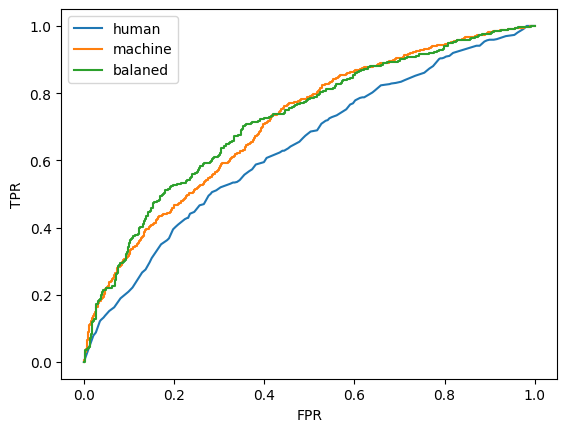

In [799]:
fpr1, tpr1, _ = roc_curve(test['smoking'], test['score_trig_age_gtp'])
fpr2, tpr2, _ = roc_curve(test['smoking'], test['y_score_cross_val'])
fpr3, tpr3, _ = roc_curve(test_balanced['smoking'], y_pred_balanced)

# plot the precision-recall curves
plt.plot(fpr1, tpr1, label='human')
plt.plot(fpr2, tpr2, label='machine')
plt.plot(fpr3, tpr3, label='balaned')
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend()
# show the plot
plt.show()

In [800]:
print('human ROC-AUC -', roc_auc_score(test['smoking'], test['score_trig_age_gtp']))
print('machine ROC-AUC -',roc_auc_score(test['smoking'], test['y_score_cross_val']))
print('balanced ROC-AUC -', roc_auc_score(test_balanced['smoking'], y_pred_balanced))

human ROC-AUC - 0.6389762604092698
machine ROC-AUC - 0.7110838551416951
balanced ROC-AUC - 0.7209405416438112


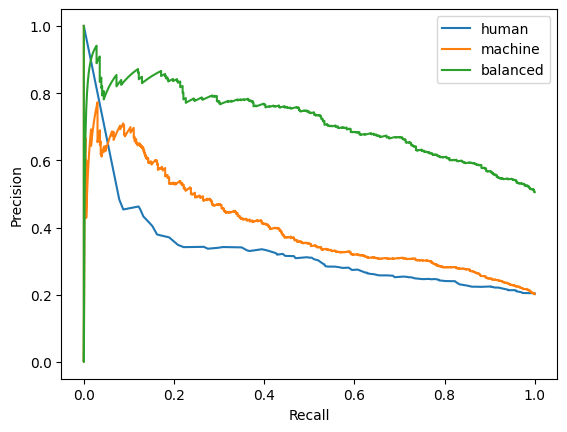

In [801]:
precision1, recall1, _ = precision_recall_curve(test['smoking'], test['score_trig_age_gtp'])
precision2, recall2, _ = precision_recall_curve(test['smoking'], test['y_score_cross_val'])
precision3, recall3, _ = precision_recall_curve(test_balanced['smoking'], y_pred_balanced)


# plot the precision-recall curves
plt.plot(recall1, precision1, label='human')
plt.plot(recall2, precision2, label='machine')
plt.plot(recall3, precision3, label='balanced')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()
# show the plot
plt.show()

In [802]:
print('human precision-recall -', average_precision_score(test['smoking'], test['score_trig_age_gtp']))
print('machine precision-recall -', average_precision_score(test['smoking'], test['y_score_cross_val']))
print('balanced precision-recall -', average_precision_score(test_balanced['smoking'], y_pred_balanced))

human precision-recall - 0.3116829416993376
machine precision-recall - 0.40325950319344234
balanced precision-recall - 0.7163784993391256


##Shap

In [803]:
#import shap
shap.initjs()

In [804]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


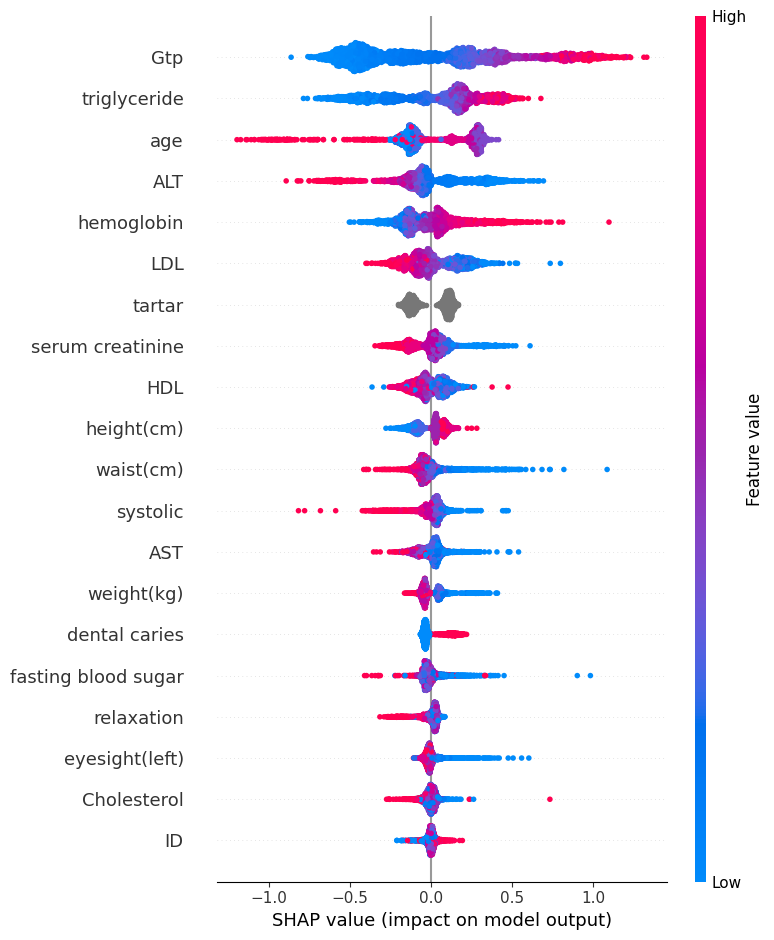

In [805]:
shap.summary_plot(shap_values, test[X])

##Submition

In [806]:
test_data_pred = Pool(data=test_kaggle[X],
                  cat_features=cat_features
                 )
test_kaggle['smoking'] = model_cb_sam.predict(test_data_pred)

In [807]:
test_kaggle[['ID', 'smoking']].to_csv('predict_1.csv', index=False)

In [808]:
test_kaggle[['ID', 'smoking']]

,ID,smoking
0,19200,1
1,7784,0
2,11682,1
3,9949,0
4,9378,1
...,...,...
5937,17154,0
5938,19366,0
5939,1170,0
5940,9358,0
